# Predicting  The Car  Price 

# Import the libraries
Import Necessary Libraries To ensure the necessary libraries are installed correctly and up-to-date, print the version numbers for each library. This will also improve the reproducibility of our project.

In [22]:
import sys    #for python version
import sklearn
import pandas
import numpy
import seaborn
import matplotlib

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Scikit-learn: 0.22.1
Pandas: 1.0.1
Numpy: 1.18.1
seaborn: 0.10.0
matplotlib: 3.1.3


# Exploratory Data Analysis 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

## Importing dataset
1. Since data is in form of CSV file we have to use pandas read_Csv to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Complete summary of data by using describe inbuilt function.

In [61]:
df_train=pd.read_csv('car data.csv')

In [62]:
df_train.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [63]:
#shape of dataset with rows and columns
print("Input data has {} rows and {} col".format(len(df_train),len(df_train.columns)))

Input data has 301 rows and 9 col


In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


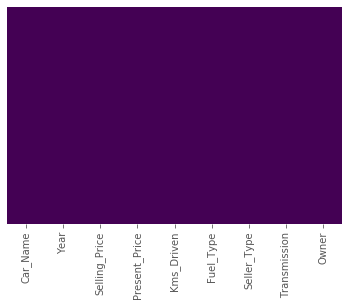

In [65]:
#check for null values in dataset
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There is no missing values in the dataset

In [66]:
df_train.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [67]:
df_train.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Feature Engineering

 Now we can get how many years the car is in used we can get this by subtracting from current year to given year so that we can get the year.

In [68]:
df_train['current_year']=2020

In [69]:
df_train['No_years']=df_train['current_year']-df_train['Year']

In [70]:
df_train.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,No_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


## Handling categorical data

In [71]:
numerical_features = [variables for variables in df_train.columns if df_train[variables].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  7
['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'current_year', 'No_years']


In [72]:
Categorical_features = [variables for variables in df_train.columns if df_train[variables].dtypes =='O']
print('Number of Categorical variables: ', len(Categorical_features))
print(Categorical_features)

Number of Categorical variables:  4
['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [73]:
print(df_train['Seller_Type'].unique())
print(df_train['Fuel_Type'].unique())
print(df_train['Transmission'].unique())
print(df_train['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [74]:
df_train=df_train.drop(['Car_Name','Year','current_year'],axis=1)

In [75]:
df_train=pd.get_dummies(df_train,drop_first=True)

In [76]:
df_train.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


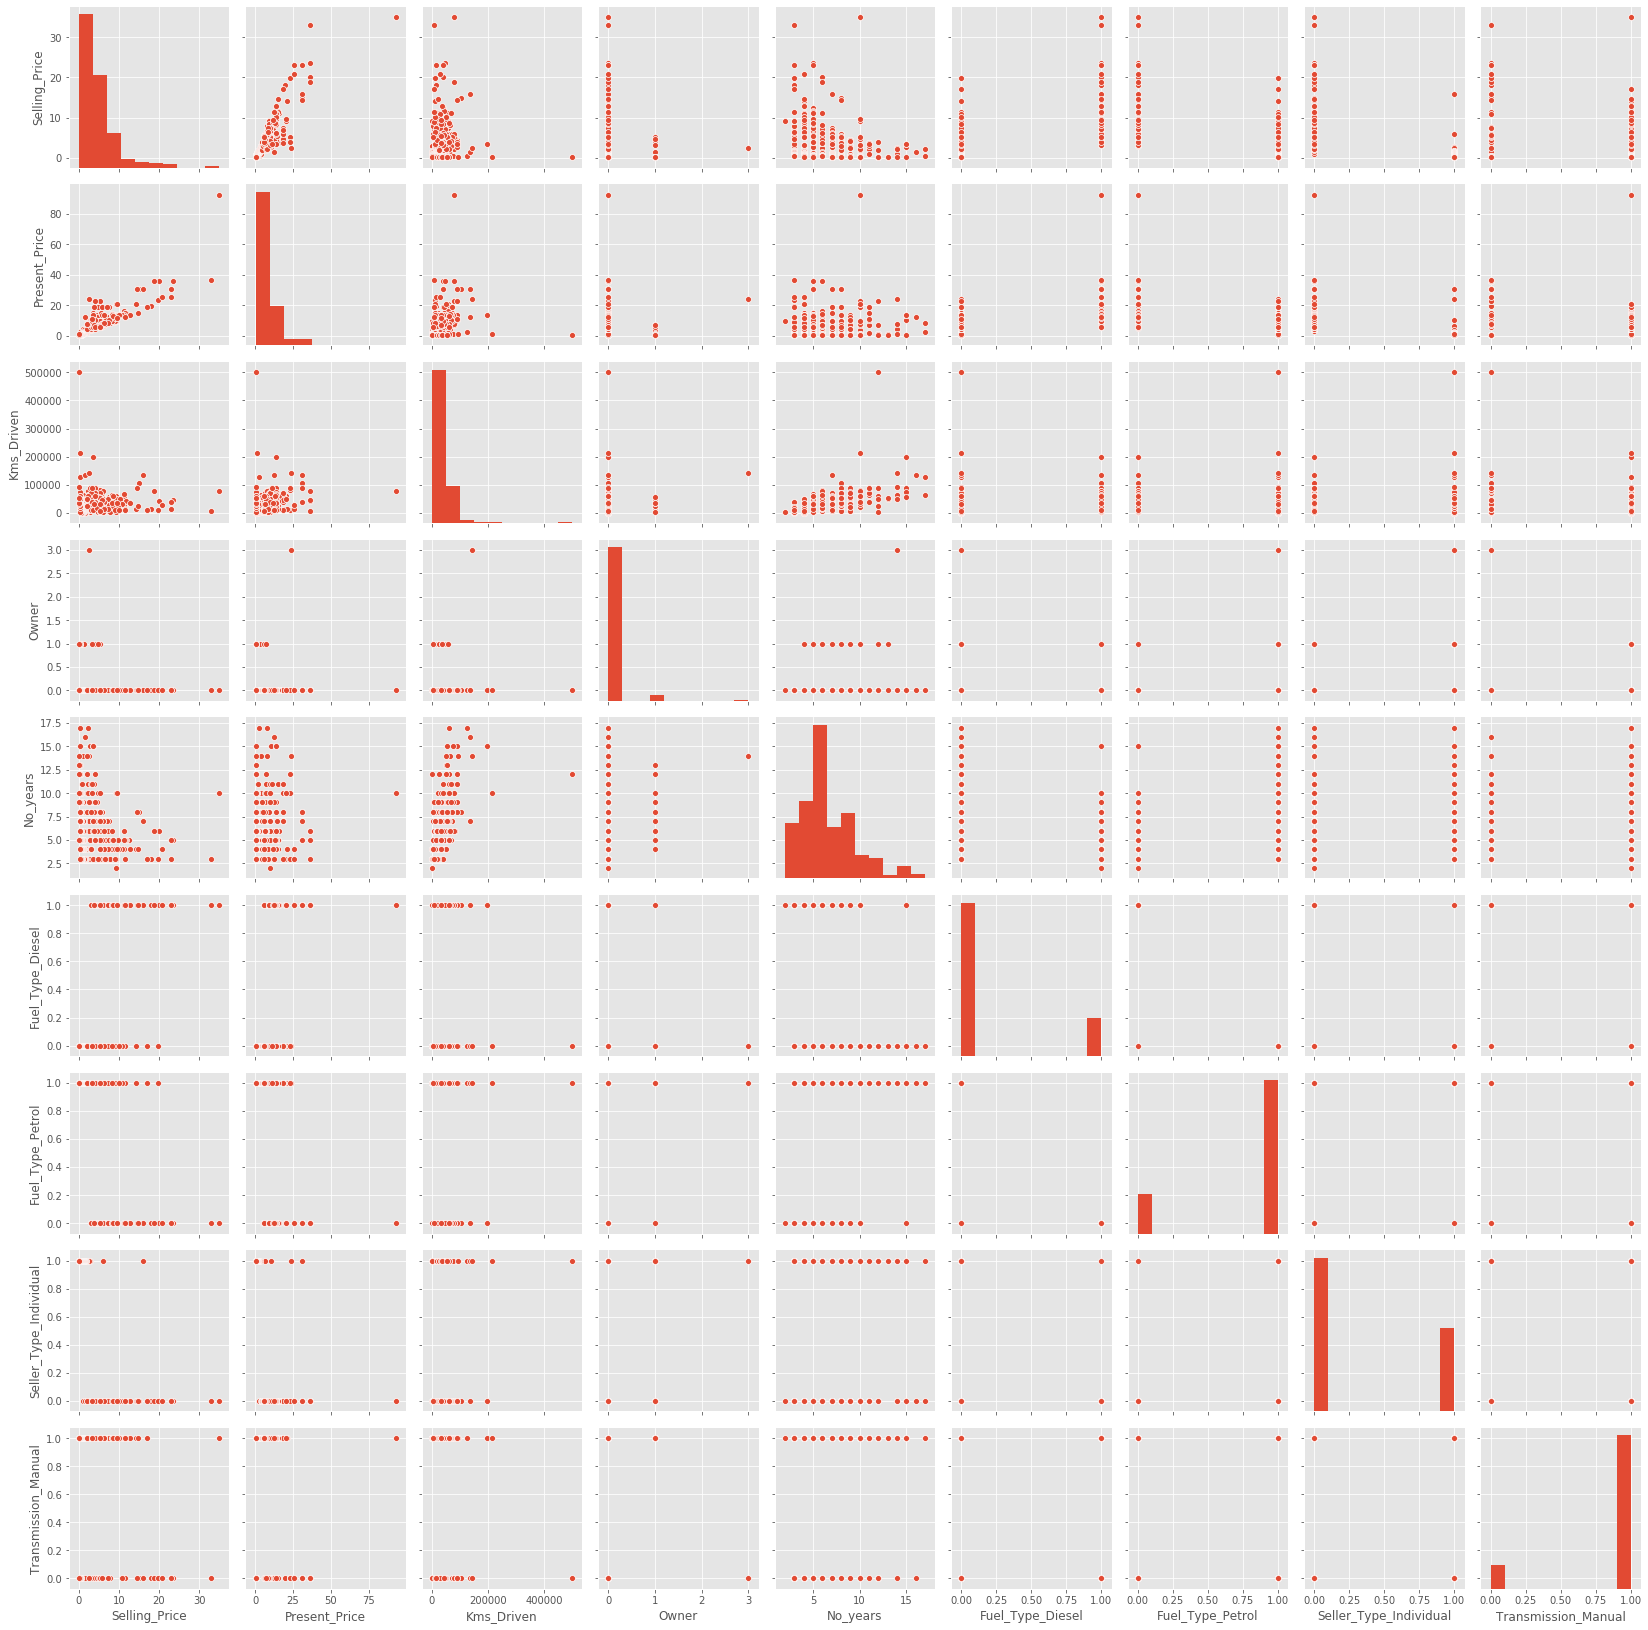

In [77]:
sns.pairplot(df_train)

In [79]:
df_train.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


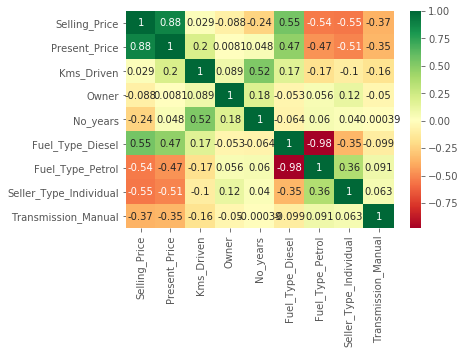

In [80]:
sns.heatmap(df_train.corr(),annot=True,cmap="RdYlGn")

## Feature Selection

In [82]:
X=df_train.drop(['Selling_Price'],axis=1)

In [83]:
y=df_train['Selling_Price']

In [85]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [86]:
print(model.feature_importances_)

[0.37854909 0.0398883  0.00090001 0.07599047 0.22845014 0.01722786
 0.11850737 0.14048676]


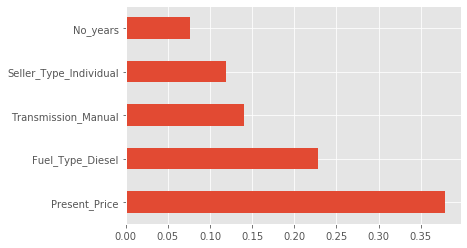

In [87]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Model building

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [93]:
y_pred = rf.predict(X_test)

In [94]:
rf.score(X_train, y_train)

0.9855457320550834

In [95]:
rf.score(X_test, y_test)

0.9133913003450961

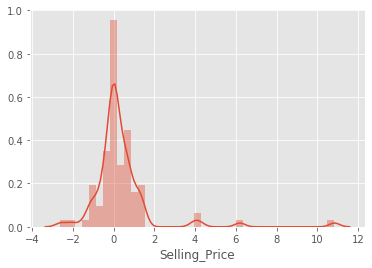

In [96]:
sns.distplot(y_test-y_pred)
plt.show()

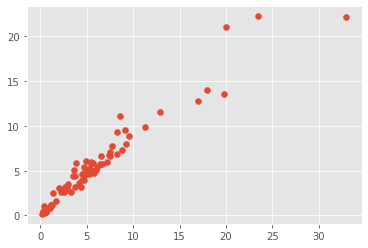

In [97]:
plt.scatter(y_test,y_pred)

In [98]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9557150727832516
MAE: 0.7751010989010994
MSE: 2.5901246832967018
RMSE: 1.6093864306923622


# Hyperparameter Tuning for Random Forest


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [101]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [102]:
# Random search of parameters, using 5 fold cross validation, 
Rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [103]:
Rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [104]:
Rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [105]:
prediction = Rf_random.predict(X_test)

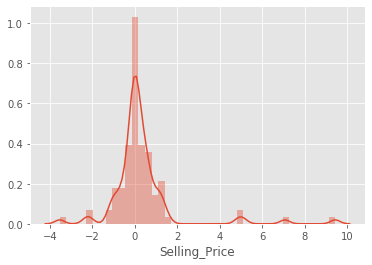

In [106]:
sns.distplot(y_test-prediction)

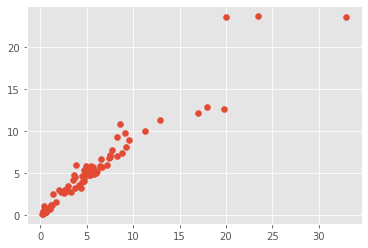

In [107]:
plt.scatter(y_test, prediction)

In [108]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, prediction)))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R square: 0.9548896631995282
MAE: 0.7742519965413109
MSE: 2.6372874755636118
RMSE: 1.6239727447108254


In [109]:
import pickle
# open a file, where you ant to store the data
file = open('car_rf.pkl', 'wb')

# dump information to that file
pickle.dump(Rf_random, file)

In [110]:
model = open('car_rf.pkl','rb')
forest = pickle.load(model)

In [111]:
y_prediction = forest.predict(X_test)

In [112]:
metrics.r2_score(y_test, y_prediction)

0.9118142688853084